Problem Statement:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

In [3]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importing Dataset
country_data = pd.read_csv('Country-data.csv')
country_data.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
#info of the dataset
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [6]:
# Checking the percentage of missing values
round(100*(country_data.isnull().sum()/len(country_data.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [7]:
#percentages to numbers for 'exports', 'imports', 'health' as mentioned in data definition file
pd.options.display.float_format = '{:,.3f}'.format
country_data['exports'] = country_data['exports']*country_data['gdpp']/100
country_data['imports'] = country_data['imports']*country_data['gdpp']/100
country_data['health'] = country_data['health']*country_data['gdpp']/100
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [8]:
#Dropping the country column from original dataframe and assigning to another dataframe
Country_df = country_data.drop(['country'],axis=1)
colnames = list(country_data.drop('country',axis=1).columns)

Country_df.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.200,55.300,41.917,248.297,1610,9.440,56.200,5.820,553
1,16.600,"1,145.200",267.895,"1,987.740",9930,4.490,76.300,1.650,4090
2,27.300,"1,712.640",185.982,"1,400.440",12900,16.100,76.500,2.890,4460
3,119.000,"2,199.190",100.605,"1,514.370",5900,22.400,60.100,6.160,3530
4,10.300,"5,551.000",735.660,"7,185.800",19100,1.440,76.800,2.130,12200


In [9]:
#Checking percentiles to check the outliers in data 
country_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000,167.000,167.000,167.000,167.000,167.000,167.000,167.000,167.000
mean,38.270,"7,420.619","1,056.733","6,588.352","17,144.689",7.782,70.556,2.948,"12,964.156"
std,40.329,"17,973.886","1,801.409","14,710.810","19,278.068",10.571,8.893,1.514,"18,328.705"
min,2.600,1.077,12.821,0.651,609.000,-4.210,32.100,1.150,231.000
25%,8.250,447.140,78.535,640.215,"3,355.000",1.810,65.300,1.795,"1,330.000"
50%,19.300,"1,777.440",321.886,"2,045.580","9,960.000",5.390,73.100,2.410,"4,660.000"
75%,62.100,"7,278.000",976.940,"7,719.600","22,800.000",10.750,76.800,3.880,"14,050.000"
90%,100.220,"17,760.600","3,825.416","15,034.280","41,220.000",16.640,80.400,5.322,"41,840.000"
95%,116.000,"31,385.100","4,966.701","24,241.560","48,290.000",20.870,81.400,5.861,"48,610.000"
99%,153.400,"64,794.260","8,410.330","55,371.390","84,374.000",41.478,82.370,6.564,"79,088.000"


#Let's begin with analysis part
# Principal Component Analysis

In [10]:
#Scaling the dataframe
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
Country_df1 = standard_scaler.fit_transform(Country_df)

In [11]:
Country_df1

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [12]:
Country_df1.shape

(167, 9)

In [13]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [14]:
#Performing the PCA
pca.fit(Country_df1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [15]:
#List of PCA components.
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [16]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

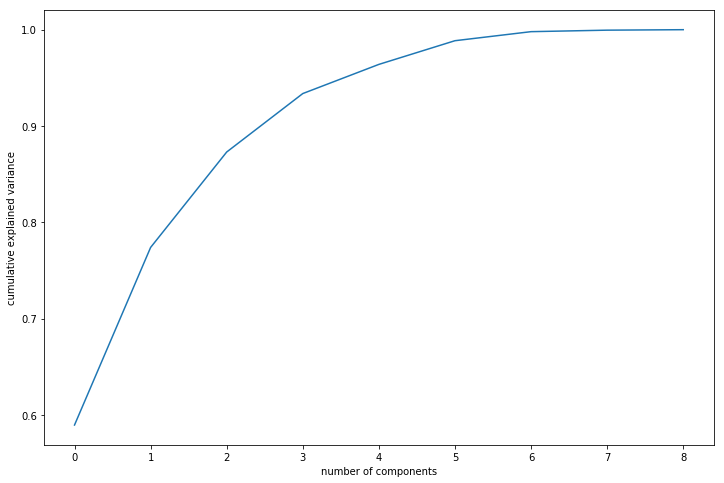

In [17]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Around 80 to 85% of the information is being explained by 3 component

In [18]:
# verifying the PCA components

pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],
                       'PC3':pca.components_[2],'Feature':colnames})
pcs_df

,PC1,PC2,PC3,Feature
0,-0.316,0.476,-0.150,child_mort
1,0.343,0.397,-0.031,exports
2,0.359,0.155,-0.076,health
3,0.345,0.371,-0.072,imports
4,0.380,0.128,0.146,income
5,-0.143,0.221,0.948,inflation
6,0.344,-0.370,0.197,life_expec
7,-0.303,0.460,-0.078,total_fer
8,0.400,0.201,0.010,gdpp


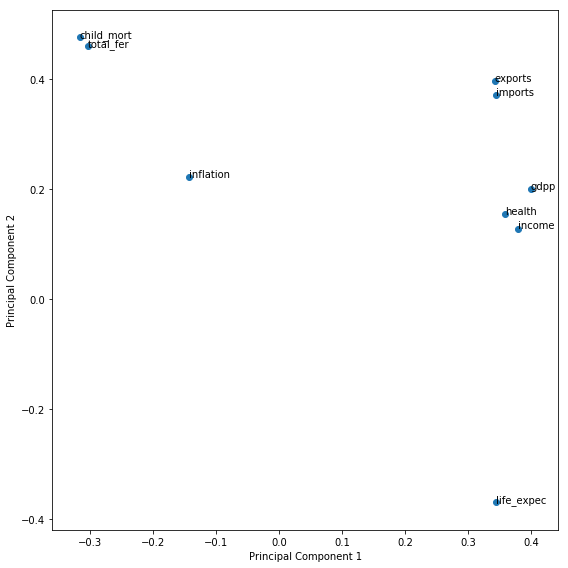

In [19]:
## Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [20]:
#Finally let's go ahead and do dimenstionality reduction using the two Principal Components
#First 3 components  which are nearly 95% explained.
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [21]:
df_pca = pca_final.fit_transform(Country_df1)
df_pca.shape

(167, 3)

In [22]:
df_pca

array([[-2.63744157e+00,  1.46903797e+00, -5.41359106e-01],
       [-2.22769569e-02, -1.43189586e+00, -2.07009539e-02],
       [-4.57626261e-01, -6.73300938e-01,  9.61867281e-01],
       [-2.72452030e+00,  2.17458267e+00,  6.06686548e-01],
       [ 6.49848516e-01, -1.02437392e+00, -2.50102847e-01],
       [ 3.71968554e-02, -6.80889086e-01,  1.46696276e+00],
       [-3.32691520e-01, -1.27451685e+00,  1.76636110e-01],
       [ 3.18036154e+00, -2.50784878e-01, -1.16877257e-01],
       [ 3.81568156e+00,  2.56083499e-01, -2.70495294e-01],
       [-4.67515152e-01, -4.93492360e-01,  6.03288028e-01],
       [ 1.49875246e+00, -4.28907400e-01, -5.50237572e-01],
       [ 1.47097104e+00, -3.26795693e-01,  4.28411771e-01],
       [-1.01419903e+00, -7.11807758e-01, -1.16988551e-01],
       [ 8.45238116e-01, -1.00860625e+00, -4.17261615e-01],
       [-1.34473920e-02, -9.82186148e-01,  8.80913018e-01],
       [ 3.96087770e+00,  8.38740841e-01, -2.94077196e-01],
       [-4.02707071e-01, -9.21816189e-01

In [23]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [24]:
# Appending Country name to transaformed data 

pca_columns=['PC1','PC2','PC3']
df_pca = pd.DataFrame(df_pca,columns=pca_columns)
df_pca = pd.concat([country_data['country'],df_pca],axis=1)
df_pca.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637,1.469,-0.541
1,Albania,-0.022,-1.432,-0.021
2,Algeria,-0.458,-0.673,0.962
3,Angola,-2.725,2.175,0.607
4,Antigua and Barbuda,0.650,-1.024,-0.250


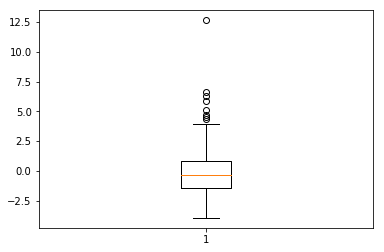

In [25]:
## Let's perform Outlier Analysis
#Let's do the outlier analysis before proceeding to clustering
plt.boxplot(df_pca.PC1)
Q1 = df_pca.PC1.quantile(0.05)
Q3 = df_pca.PC1.quantile(0.95)
IQR = Q3 - Q1
df_pca =df_pca[(df_pca.PC1 >= Q1) & (df_pca.PC1 <= Q3)]


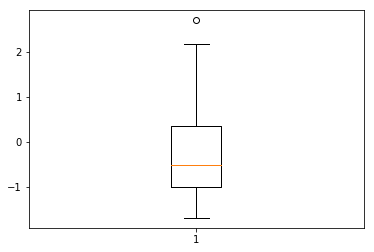

In [26]:
plt.boxplot(df_pca.PC2)
Q1 = df_pca.PC2.quantile(0.05)
Q3 =df_pca.PC2.quantile(0.95)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC2 >= Q1) & (df_pca.PC2 <= Q3)]

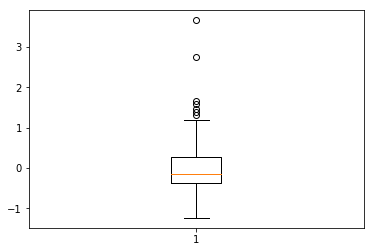

In [27]:
plt.boxplot(df_pca.PC3)
Q1 =df_pca.PC3.quantile(0.05)
Q3 = df_pca.PC3.quantile(0.95)
IQR = Q3 - Q1
df_pca= df_pca[(df_pca.PC3 >= Q1) & (df_pca.PC3 <= Q3)]

In [28]:
df_pca.shape

(119, 4)

In [29]:
# Reset the index for new dataframe with no outliers.

df_pca_df1 = df_pca.reset_index()
df_pca_df2 =df_pca_df1
df_pca_df1.head()

,index,country,PC1,PC2,PC3
0,0,Afghanistan,-2.637,1.469,-0.541
1,2,Algeria,-0.458,-0.673,0.962
2,4,Antigua and Barbuda,0.650,-1.024,-0.250
3,6,Armenia,-0.333,-1.275,0.177
4,7,Australia,3.180,-0.251,-0.117


In [30]:
# New data frame with principal components

df_pca = df_pca.drop(columns=['country']).reset_index()
df_pca = df_pca.drop(columns=['index'])
df_pca.head()

,PC1,PC2,PC3
0,-2.637,1.469,-0.541
1,-0.458,-0.673,0.962
2,0.650,-1.024,-0.250
3,-0.333,-1.275,0.177
4,3.180,-0.251,-0.117


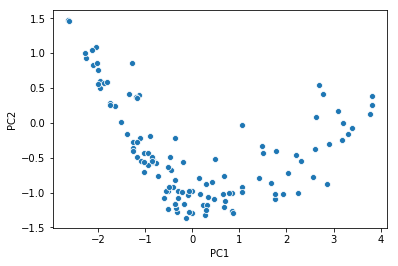

In [31]:
#Visualising the points on the PC1 and PC2.
sns.scatterplot(x='PC1',y='PC2',data=df_pca_df1)

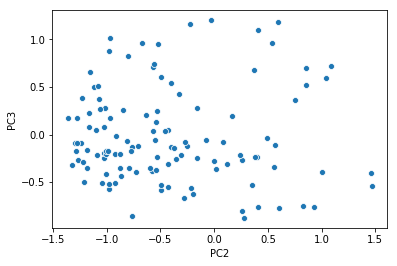

In [32]:
#Visualising the points on the PC2 and PC3.
sns.scatterplot(x='PC2',y='PC3',data=df_pca_df1)

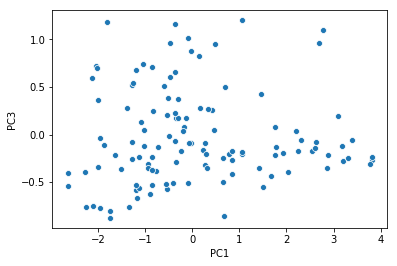

In [33]:
#Visualising the points on the PC1 and PC3.
sns.scatterplot(x='PC1',y='PC3',data=df_pca_df1)

Clustering-K-means

In [34]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
#Let's check the Hopkins measure
hopkins(df_pca)

0.7619096719131621

#Since the value is > 0.5 the given dataset has a good tendency to form clusters.

In [36]:
#Importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

In [37]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    sse_.append([k, silhouette_score(df_pca, kmeans.labels_)])

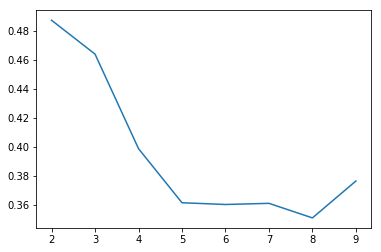

In [38]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

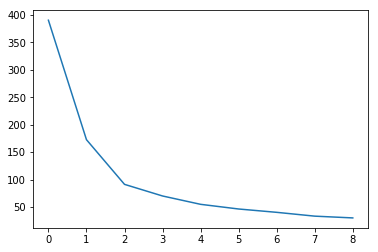

In [39]:
## From the above analysis we find that 2 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [40]:
# Kmeans with K clusters

clstrs = 3

model_clus = KMeans(n_clusters = clstrs, max_iter=50)
model_clus.fit(df_pca)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
# List of clusters for the data
model_clus.labels_

array([0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2,
       2, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1,
       2, 2, 0, 2, 2, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0,
       2, 1, 1, 1, 2, 2, 0, 2, 0])

In [42]:
# Appending cluster to PCA components data frame

pca_df1 = pd.concat([pd.Series(model_clus.labels_),df_pca],axis=1)
pca_df1 = pca_df1.rename(columns = {0:'ClusterID'})

pca_df1.head()

,ClusterID,PC1,PC2,PC3
0,0,-2.637,1.469,-0.541
1,2,-0.458,-0.673,0.962
2,2,0.650,-1.024,-0.250
3,2,-0.333,-1.275,0.177
4,1,3.180,-0.251,-0.117


In [43]:
Country_data_pca_df = pd.concat([df_pca_df1, pca_df1['ClusterID']], axis=1)
Country_data_pca_df.head()

,index,country,PC1,PC2,PC3,ClusterID
0,0,Afghanistan,-2.637,1.469,-0.541,0
1,2,Algeria,-0.458,-0.673,0.962,2
2,4,Antigua and Barbuda,0.650,-1.024,-0.250,2
3,6,Armenia,-0.333,-1.275,0.177,2
4,7,Australia,3.180,-0.251,-0.117,1


In [44]:
# Appending cluster to full data frame

Country_data1 = pd.merge(Country_data_pca_df,country_data,how='inner',on='country')
Country_data1 = Country_data1.drop(columns=['PC1','PC2','PC3','index'])
Country_data1.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.200,55.300,41.917,248.297,1610,9.440,56.200,5.820,553
1,Algeria,2,27.300,"1,712.640",185.982,"1,400.440",12900,16.100,76.500,2.890,4460
2,Antigua and Barbuda,2,10.300,"5,551.000",735.660,"7,185.800",19100,1.440,76.800,2.130,12200
3,Armenia,2,18.100,669.760,141.680,"1,458.660",6700,7.770,73.300,1.690,3220
4,Australia,1,4.800,"10,276.200","4,530.870","10,847.100",41400,1.160,82.000,1.930,51900


In [45]:
#Checking cluster count.

Country_data1['ClusterID'].value_counts()

2    61
0    31
1    27
Name: ClusterID, dtype: int64

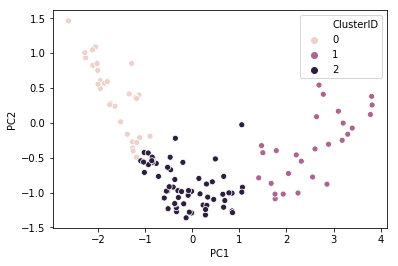

In [46]:
#Plotting PC1 and PC2 on with Clusters
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=Country_data_pca_df)

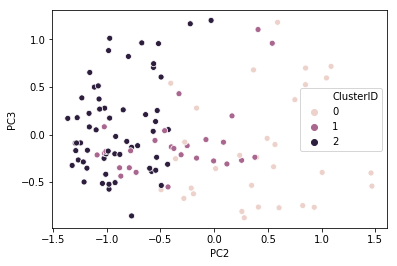

In [47]:
##Plotting PC2 and PC3 on with Clusters
sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',legend='full',data=Country_data_pca_df)

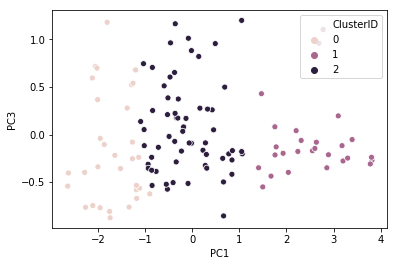

In [48]:
#Plotting PC1 and PC3 on with Clusters
sns.scatterplot(x='PC1',y='PC3',hue='ClusterID',legend='full',data=Country_data_pca_df)

Analysis of the clusters

In [49]:
# Checking the mean values for all the measures by cluster

Country_data_mean = Country_data1.groupby('ClusterID').agg('mean').reset_index()
Country_data_mean

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,63.652,861.024,128.779,858.978,"4,450.000",9.736,63.329,4.112,"2,072.161"
1,1,5.322,"14,504.026","3,249.134","13,650.456","37,170.370",2.205,79.778,1.749,"34,696.296"
2,2,20.221,"3,071.620",406.979,"3,160.475","12,796.557",6.628,73.208,2.272,"6,636.361"


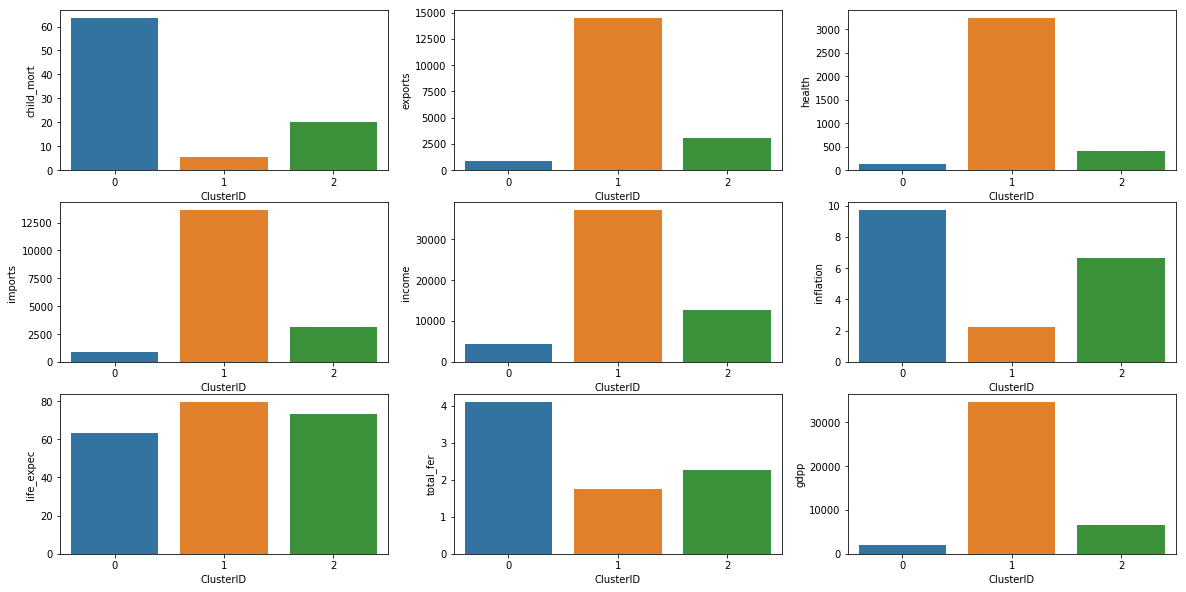

In [50]:
# Bar plot to see the mean values of the measures by cluster.


columns = list(Country_data_mean)
columns.remove('ClusterID')

plt.figure(figsize=(20,10))
i=1
for col in columns:
    plt.subplot(3,3,i)
    sns.barplot(y=col,x='ClusterID',data=Country_data_mean)
    i=i+1

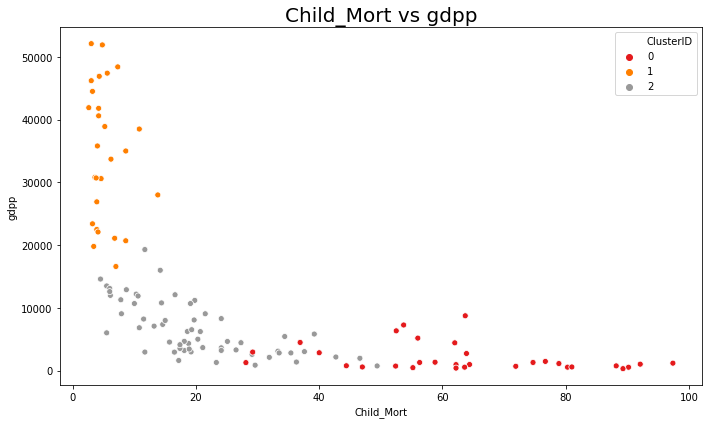

In [51]:
%matplotlib inline
fig = plt.figure(figsize = (10,6))
sns.scatterplot(y='gdpp',x='child_mort',data=Country_data1,hue='ClusterID',legend='full',palette="Set1")
plt.xlabel('Child_Mort')
plt.ylabel('gdpp')
plt.title('Child_Mort vs gdpp',fontsize=20)
plt.tight_layout()
plt.show()

In [66]:
# Finding the 5 countries with high Child mort and less gdpp

Country_data1[Country_data1['ClusterID']==0].sort_values(['child_mort','gdpp'],ascending=[False, True]).head(5)

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
71,Mauritania,0,97.400,608.400,52.920,734.400,3320,18.900,68.200,4.980,1200
81,Pakistan,0,92.100,140.400,22.880,201.760,4280,10.900,65.300,3.850,1040
0,Afghanistan,0,90.200,55.300,41.917,248.297,1610,9.440,56.200,5.820,553
64,Liberia,0,89.300,62.457,38.586,302.802,700,5.470,60.800,5.020,327
24,Comoros,0,88.200,126.885,34.682,397.573,1410,3.870,65.900,4.750,769


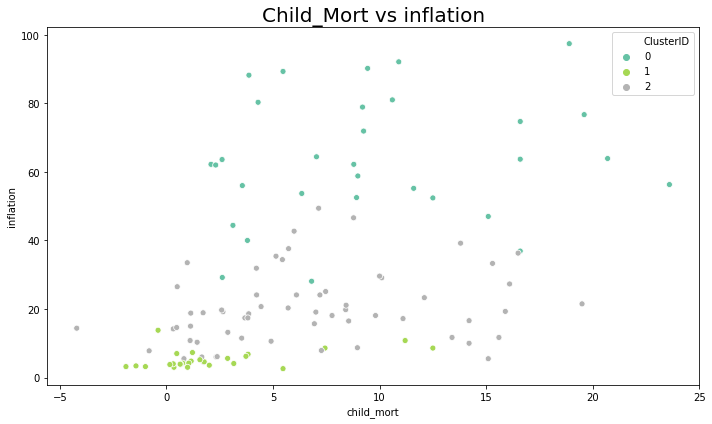

In [53]:
%matplotlib inline
fig = plt.figure(figsize = (10,6))
sns.scatterplot(y='child_mort',x='inflation',data=Country_data1,hue='ClusterID',legend='full',palette="Set2")
plt.xlabel('child_mort')
plt.ylabel('inflation')
plt.title('Child_Mort vs inflation',fontsize=20)
plt.tight_layout()
plt.show()

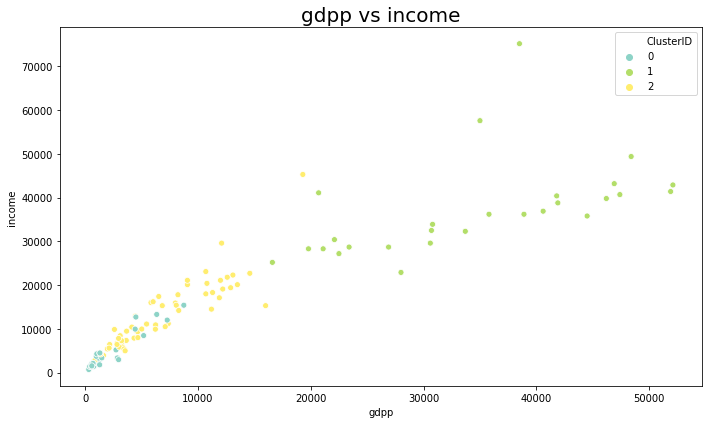

In [54]:
%matplotlib inline
fig = plt.figure(figsize = (10,6))
sns.scatterplot(y='income',x='gdpp',data=Country_data1,hue='ClusterID',legend='full',palette="Set3")
plt.xlabel('gdpp')
plt.ylabel('income')
plt.title('gdpp vs income',fontsize=20)
plt.tight_layout()
plt.show()

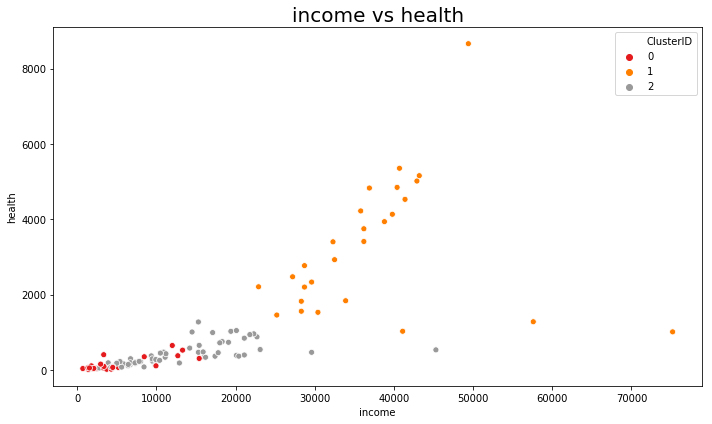

In [55]:
%matplotlib inline
fig = plt.figure(figsize = (10,6))
sns.scatterplot(x='income',y='health',data=Country_data1,hue='ClusterID',legend='full',palette="Set1")
plt.xlabel('income')
plt.ylabel('health')
plt.title('income vs health',fontsize=20)
plt.tight_layout()
plt.show()

Hierarchical clustering

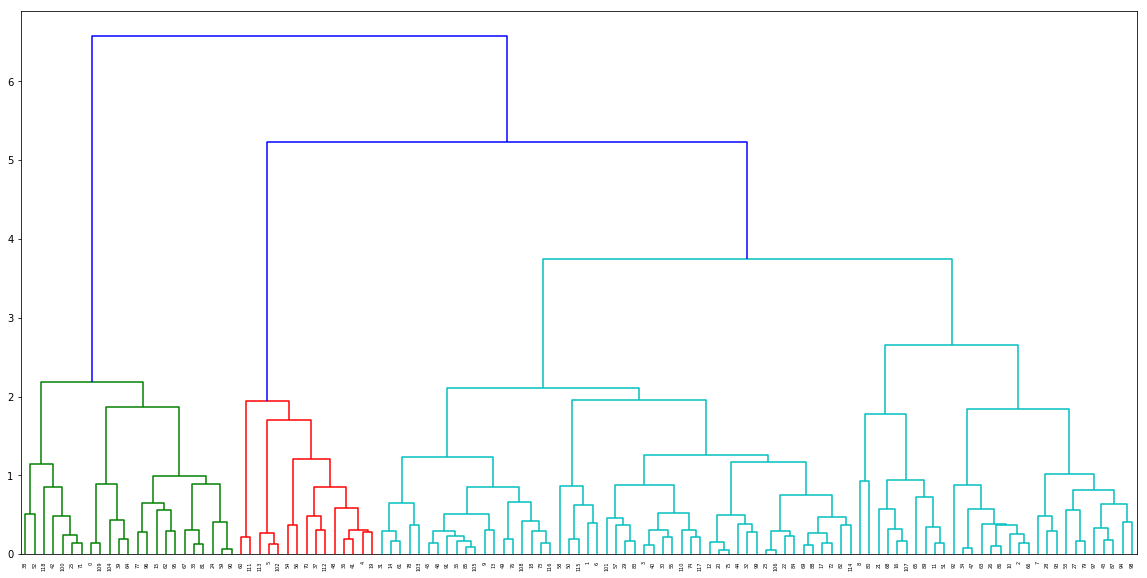

In [56]:

# Dendrogram for principal components
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20,10))
mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)

plt.show()

In [57]:
# Considering 6 clusters
from scipy.cluster.hierarchy import cut_tree
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 6).reshape(-1,))
Country_pca_herc = pd.concat([df_pca_df1, clusterCut], axis=1)
Country_pca_herc=Country_pca_herc.rename({0:'ClusterID'},axis=1)
Country_pca_herc.head()

,index,country,PC1,PC2,PC3,ClusterID
0,0,Afghanistan,-2.637,1.469,-0.541,0
1,2,Algeria,-0.458,-0.673,0.962,1
2,4,Antigua and Barbuda,0.650,-1.024,-0.250,2
3,6,Armenia,-0.333,-1.275,0.177,1
4,7,Australia,3.180,-0.251,-0.117,3


In [58]:
# Count of countries by cluster
Country_pca_herc['ClusterID'].value_counts()

1    51
2    20
0    16
3    15
4    10
5     7
Name: ClusterID, dtype: int64

In [59]:
#Assigning cluster to main data frame

Country_data_herc = pd.merge(Country_pca_herc,country_data,how='inner',on='country')
Country_data_herc=Country_data_herc.drop(columns=['PC1','PC2','PC3','index'])
Country_data_herc.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.200,55.300,41.917,248.297,1610,9.440,56.200,5.820,553
1,Algeria,1,27.300,"1,712.640",185.982,"1,400.440",12900,16.100,76.500,2.890,4460
2,Antigua and Barbuda,2,10.300,"5,551.000",735.660,"7,185.800",19100,1.440,76.800,2.130,12200
3,Armenia,1,18.100,669.760,141.680,"1,458.660",6700,7.770,73.300,1.690,3220
4,Australia,3,4.800,"10,276.200","4,530.870","10,847.100",41400,1.160,82.000,1.930,51900


In [60]:
# Mean values for all  clusters

Country_herc_clustr = Country_data_herc.groupby('ClusterID').agg('mean').reset_index()
Country_herc_clustr

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,69.088,594.807,130.644,785.042,"3,715.625",7.110,60.950,4.455,"1,763.938"
1,1,28.202,"1,596.766",244.705,"1,837.445","8,350.392",6.813,71.576,2.538,"4,017.882"
2,2,6.615,"9,304.775","1,625.982","9,804.000","25,040.000",0.775,77.350,1.666,"20,060.000"
3,3,5.173,"17,256.080","4,132.270","15,558.527","42,853.333",2.817,80.487,1.774,"42,066.667"
4,4,12.720,"5,894.767",643.572,"4,552.337","24,570.000",11.409,74.830,2.027,"11,923.000"
5,5,67.086,"1,547.557",147.829,961.131,"6,788.571",18.943,64.957,4.627,"3,041.429"


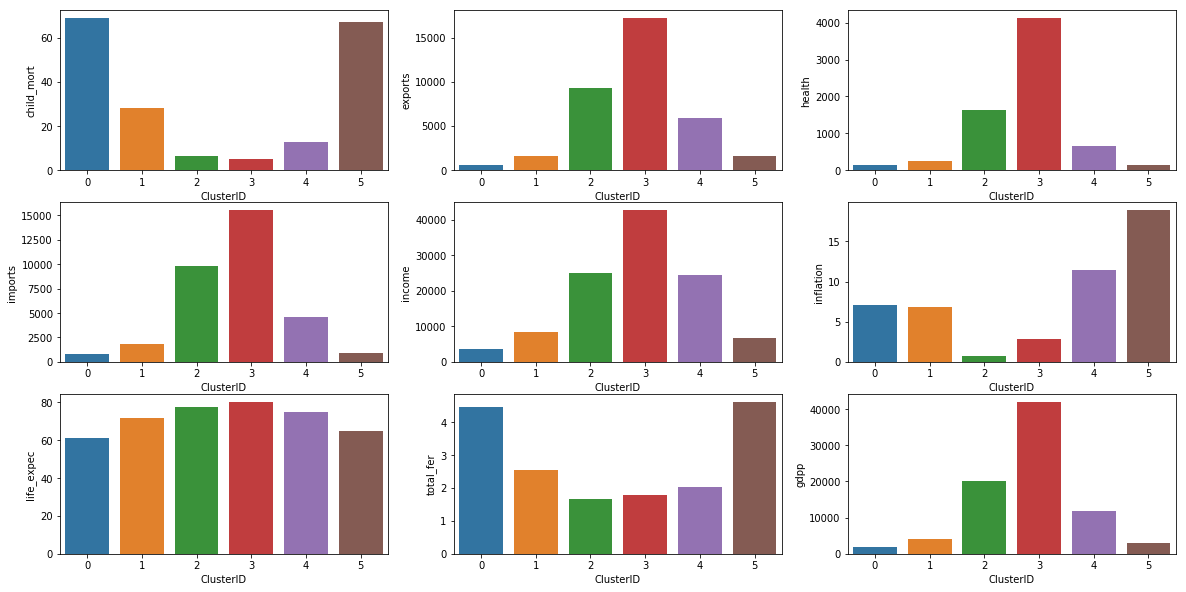

In [61]:
# Barplot to see the mean values for Hierarchial clustering

plt.figure(figsize=(20,10))
i=1
for col in columns:
    plt.subplot(3,3,i)
    sns.barplot(y=col,x='ClusterID',data=Country_herc_clustr)
    i=i+1

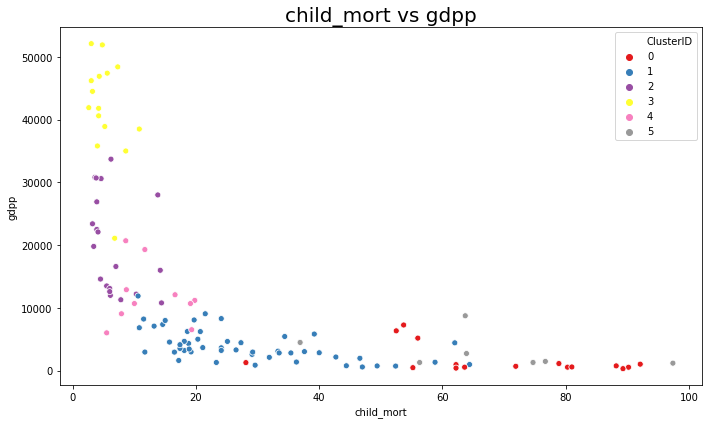

In [62]:
%matplotlib inline
fig = plt.figure(figsize = (10,6))
sns.scatterplot(x='child_mort',y='gdpp',data=Country_data_herc, hue='ClusterID',legend='full',palette="Set1")
plt.xlabel('child_mort')
plt.ylabel('gdpp')
plt.title('child_mort vs gdpp',fontsize=20)
plt.tight_layout()
plt.show()

In [63]:
# Finding the 5 countries with high Child mort and less gdpp
Country_data1[Country_data_herc['ClusterID']==0].sort_values(['child_mort','gdpp'],ascending=[False, True]).head(5)

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
81,Pakistan,0,92.100,140.400,22.880,201.760,4280,10.900,65.300,3.850,1040
0,Afghanistan,0,90.200,55.300,41.917,248.297,1610,9.440,56.200,5.820,553
64,Liberia,0,89.300,62.457,38.586,302.802,700,5.470,60.800,5.020,327
24,Comoros,0,88.200,126.885,34.682,397.573,1410,3.870,65.900,4.750,769
109,Uganda,0,81.000,101.745,53.609,170.170,1540,10.600,56.800,6.150,595


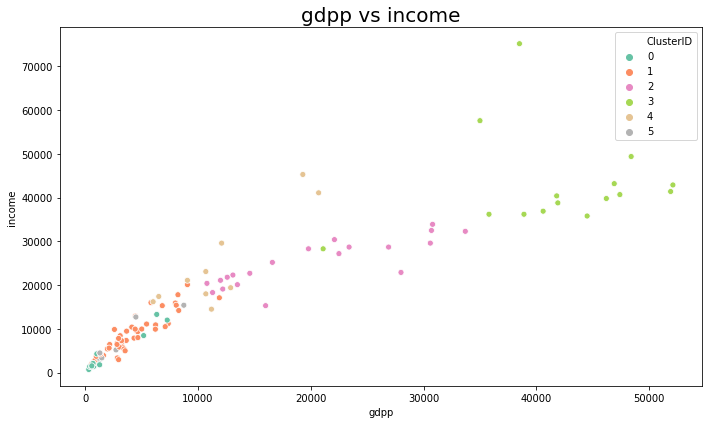

In [64]:
%matplotlib inline
fig = plt.figure(figsize = (10,6))
sns.scatterplot(x='gdpp',y='income',data=Country_data_herc,hue='ClusterID',legend='full',palette="Set2")
plt.xlabel('gdpp')
plt.ylabel('income')
plt.title('gdpp vs income',fontsize=20)
plt.tight_layout()
plt.show()

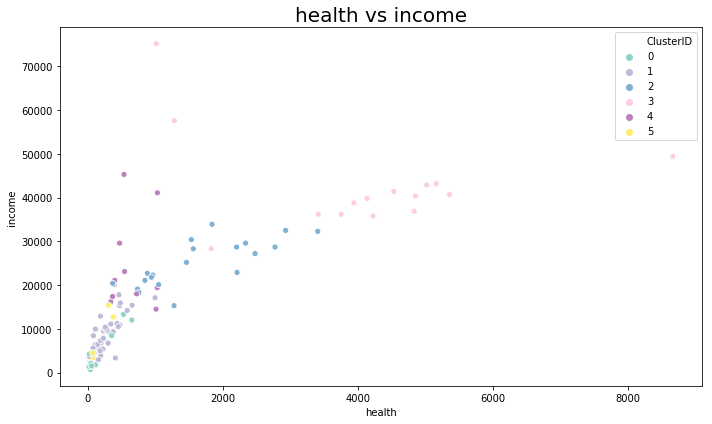

In [65]:
%matplotlib inline
fig = plt.figure(figsize = (10,6))
sns.scatterplot(x='health',y='income',data=Country_data_herc,hue='ClusterID',legend='full',palette="Set3")
plt.xlabel('health')
plt.ylabel('income')
plt.title('health vs income',fontsize=20)
plt.tight_layout()
plt.show()